In [1]:

import pandas as pd

marketing = pd.read_csv('marketing.csv')


In [2]:
print(marketing.head(5))
print(marketing.describe(include='all'))
print(marketing.info())


      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [3]:
print(marketing['is_retained'].dtype)

marketing['is_retained'] = marketing['is_retained'].astype('bool')

print(marketing['is_retained'].dtype)
     

object
bool


In [4]:
channel_dict = {"House Ads": 1, "Instagram": 2,
                "Facebook": 3, "Email": 4, "Push": 5}

marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [5]:
import numpy as np

marketing['is_correct_lang'] = np.where(marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')

In [7]:
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

C:\Users\24114290045\AppData\Local\Temp\ipykernel_4444\1169099039.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])
C:\Users\24114290045\AppData\Local\Temp\ipykernel_4444\1169099039.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])
C:\Users\24114290045\AppData\Local\Temp\ipykernel_4444\1169099039.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd

In [8]:
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


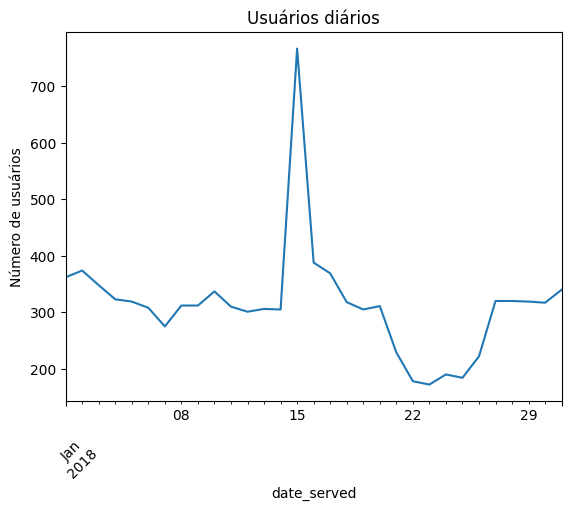

In [9]:
import matplotlib.pyplot as plt

daily_users.plot()

plt.title('Usuários diários')
plt.ylabel('Número de usuários')

plt.xticks(rotation=45)

plt.show()